In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,metrics,callbacks

In [192]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [193]:
df.set_index('PassengerId',inplace = True)

In [194]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [195]:
by_sex_class = df.groupby(['Sex', 'Pclass'])
def impute_median(series):
    return series.fillna(series.median())
df['Age'] = by_sex_class['Age'].transform(impute_median)

In [196]:
df.drop(columns = ['Cabin','Name','Ticket'],inplace = True)

In [197]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [198]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [201]:
df['Embarked'].value_counts()

S    644
C    170
Q     77
Name: Embarked, dtype: int64

In [200]:
df['Embarked'].fillna('C',inplace = True)

In [202]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])

In [203]:
df['Sex']=le.fit_transform(df['Sex'])

In [204]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [205]:
df.shape

(891, 8)

In [206]:
x = df.drop(columns = 'Survived')
y = df['Survived']

In [207]:
tf.keras.backend.clear_session()

In [208]:
model = tf.keras.Sequential()
model.add(layers.BatchNormalization(input_shape = [7]))
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1,activation = 'sigmoid'))

In [209]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 7)                 28        
_________________________________________________________________
dense (Dense)                (None, 32)                256       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 893
Trainable params: 847
Non-trainable params: 46
_________________________________________________________

In [210]:
tf.keras.optimizers.Adam(lr = 0.03)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = metrics.AUC())

In [211]:
es = callbacks.EarlyStopping(patience = 10,min_delta = 0.001,restore_best_weights = True)

In [212]:
history = model.fit(x,y,validation_split = 0.2,batch_size = 30,callbacks = es,epochs = 200)

Epoch 1/200
24/24 [==============================] - 0s 8ms/step - loss: 0.8398 - auc: 0.4447 - val_loss: 0.6822 - val_auc: 0.4316
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6643 - auc: 0.6411 - val_loss: 0.6197 - val_auc: 0.6599
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6318 - auc: 0.6911 - val_loss: 0.5815 - val_auc: 0.7472
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 0.5378 - auc: 0.7996 - val_loss: 0.5516 - val_auc: 0.7971
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 0.5273 - auc: 0.8029 - val_loss: 0.5183 - val_auc: 0.8467
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 0.5217 - auc: 0.7938 - val_loss: 0.4910 - val_auc: 0.8754
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 0.4991 - auc: 0.8203 - val_loss: 0.4647 - val_auc: 0.8910
Epoch 8/200
24/24 [==============================] - 0s 2ms/step - loss: 0.5033 - a

In [213]:
history_df = pd.DataFrame(history.history)

In [214]:
history_df.head()

,loss,auc,val_loss,val_auc
0,0.839843,0.444729,0.682163,0.431590
1,0.664346,0.641108,0.619739,0.659851
2,0.631790,0.691145,0.581496,0.747215
3,0.537783,0.799626,0.551558,0.797079
4,0.527279,0.802946,0.518272,0.846739


<AxesSubplot:>

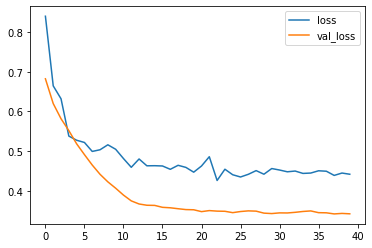

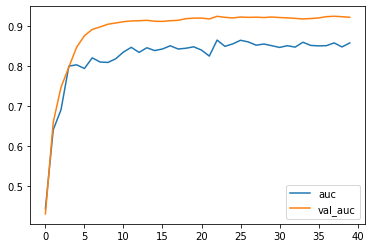

In [215]:
history_df.loc[:,('loss','val_loss')].plot()
history_df.loc[:,('auc','val_auc')].plot()

In [216]:
dfo = pd.read_csv('test.csv')
dfo.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [260]:
dfo.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [221]:
by_sex_classo = dfo.groupby(['Sex', 'Pclass'])
dfo['Age'] = by_sex_classo['Age'].transform(impute_median)

In [259]:
dfo['Fare']=dfo['Fare'].fillna(7.82)

In [245]:
dff = dfo.groupby(['Embarked'])
dff.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,1
893,3,0,47.0,1,0,7.0000,2
894,2,1,62.0,0,0,9.6875,1
895,3,1,27.0,0,0,8.6625,2
896,3,0,22.0,1,1,12.2875,2
897,3,1,14.0,0,0,9.2250,2
898,3,0,30.0,0,0,7.6292,1
899,2,1,26.0,1,1,29.0000,2
900,3,0,18.0,0,0,7.2292,0


In [218]:
dfo = dfo.drop(columns = ['Name','Ticket','Cabin'])
dfo = dfo.set_index('PassengerId')

In [219]:
dfo['Embarked']=le.fit_transform(dfo['Embarked'])
dfo['Sex']=le.fit_transform(dfo['Sex'])

In [261]:
predict = model.predict(dfo)

In [263]:
predict = predict.round()
predict

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [234]:
a = dfo[dfo.isnull().any(axis = 1)]
print(a)

             Pclass  Sex   Age  SibSp  Parch  Fare  Embarked
PassengerId                                                 
1044              3    1  60.5      0      0   NaN         2


In [264]:
submission = pd.read_csv('gender_submission.csv')

In [281]:
submission['Survived'] = pd.DataFrame(predict,dtype = int)

In [292]:
submission.to_csv('submission.csv')

In [291]:
submission.set_index('PassengerId',inplace = True)